# pNML Viz

In [ ]:
import os.path as osp

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.insert(0, "../src/")
import data_utils
from post_simulation_utils import load_simulation_results, calc_nf_from_genie_files
from pnml_utils import calc_analytic_norm_factor


In [2]:
# Plot params
mpl.style.use("seaborn-dark")
mpl.rcParams['axes.grid'] = True
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['figure.dpi'] = 85
mpl.rcParams['axes.labelsize'] = 'large'


# Load simulation resutls

In [3]:
# Fourier base
base_dir_list = [
    osp.join("..", "output", "pnml_fourier_20200616_132859_0"),
    osp.join("..", "output", "pnml_fourier_20200616_133329_1"),
    osp.join("..", "output", "pnml_fourier_20200616_133801_2"),
]

# Polynomial base
if False:
    base_dir_list = [
        osp.join("..", "output", "pnml_polynomial_20200616_143423_0"),
        osp.join("..", "output", "pnml_polynomial_20200616_144401_1"),
        osp.join("..", "output", "pnml_polynomial_20200616_145455_2"),
    ]



In [4]:
res_list = [load_simulation_results(base_dir) for base_dir in base_dir_list]
for res in res_list:
    print('model_degree={} x_train={}'.format(res['model_degree'], res['x_train']))

print()
print(res_list[0].keys())


model_degree=1 x_train=[0.055, 0.655, 0.855, 0.995]
model_degree=2 x_train=[0.055, 0.655, 0.855, 0.995]
model_degree=3 x_train=[0.055, 0.655, 0.855, 0.995]

dict_keys(['model_degree', 'x_test', 'regret', 'y_hat_erm', 'x_train', 'y_train', 'base_dir', 'genies_output_path', 'params'])


# Plot Prediction

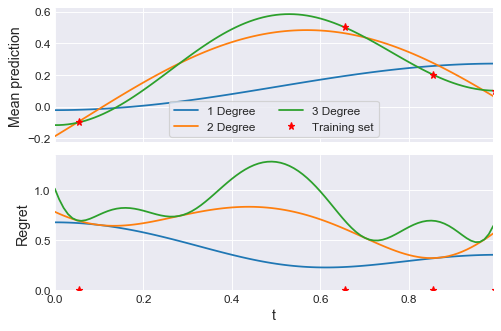

In [5]:
x_train, y_train = res_list[0]["x_train"], res_list[0]["y_train"]

fig, axs = plt.subplots(2, 1, sharex=True)
ax = axs[0]
for res in res_list:
    ax.plot(res["x_test"], res["y_hat_erm"], label=r"{} Degree".format(res["model_degree"]))
ax.plot(x_train, y_train, "r*", label="Training set")
ax.set_ylabel("Mean prediction")
ax.legend(loc=8,ncol=2)
# ax.set_ylim(-20,20)
ax.set_xlim(res["x_test"][0],res["x_test"][-1])

ax = axs[1]
for res in res_list:
    ax.plot(res["x_test"], res["regret"])
ax.plot(x_train, [0] * len(y_train), "r*")
ax.set_ylim(bottom=0.0)
ax.set_ylabel("Regret")
ax.set_xlabel("t")
plt.tight_layout()
plt.show()


# Simulation Vs Analytical

In [6]:
# Choosing which simulation to anlyze 
res = res_list[1]
x_train, y_train = res['x_train'], res['y_train']
model_deg = res['model_degree']
lamb = res['params']['lamb']
print('model_degree={} lamb={} x_train={}'.format(model_deg,lamb,x_train))


model_degree=2 lamb=0 x_train=[0.055, 0.655, 0.855, 0.995]


In [7]:
DataC = data_utils.data_type_dict[res['params']['data_type']]
data_h = DataC(x_train, y_train, model_deg)
phi_train = data_h.phi_train

# Calculate analytical regret
phi_tests = [data_h.convert_point_to_features(x_test, model_deg) for x_test in res['x_test']]
norm_factors = [calc_analytic_norm_factor(phi_train, phi_test, lamb=lamb) for phi_test in phi_tests]
regrets = np.log(norm_factors)


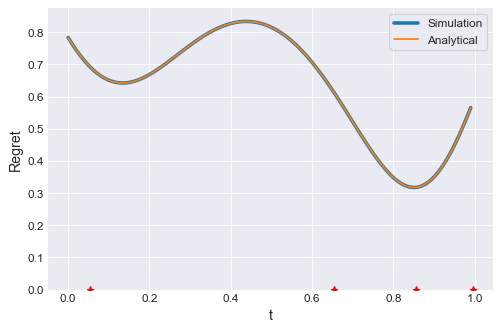

In [8]:
fig, ax = plt.subplots(1, 1)
ax.plot(res["x_test"], res["regret"], label='Simulation', linewidth=3.0)
ax.plot(res["x_test"], regrets, label='Analytical')
ax.plot(x_train, [0] * len(y_train), "r*")
ax.set_ylim(bottom=0.0)
ax.set_ylabel("Regret")
ax.set_xlabel("t")
plt.legend()
plt.tight_layout()
plt.show()


# Changing $\sigma^2$

In [9]:
sigma_squares = [1e-1, 1e-2, 1e-3]
regret_list = []
for sigma_square in sigma_squares:
    regret, debug_list = calc_nf_from_genie_files(res['genies_output_path'],sigma_square)
    regret_list.append(regret)


[]

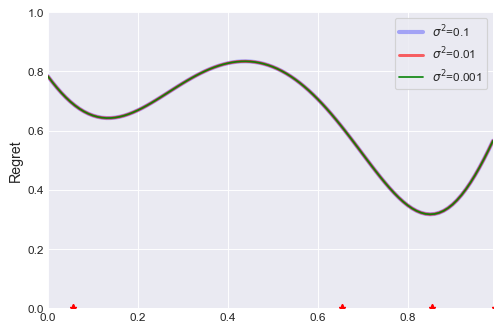

In [10]:
colors = ['b', 'r', 'g', 'y', 'p']
linewidth, alpha = 3.5,0.3

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)

for regret, sigma_square, color in zip( regret_list, sigma_squares, colors):
    ax.plot(res['x_test'], regret, color=color, label=r"$\sigma^2$={}".format(sigma_square),
            linewidth=linewidth, alpha=alpha)
    ax.plot(x_train, [0] * len(y_train), "r*")
    ax.legend()
    ax.set_ylabel('Regret')
    
    linewidth-=1.0
    alpha +=0.3
axs[-1].set_xlabel('t')
plt.xlim(res['x_test'][0],res['x_test'][-1])
plt.ylim(bottom=0)
plt.ylim(top=1)
plt.tight_layout()
plt.plot()
